In [1]:
%%info

In [2]:
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
7,application_1645574675843_0016,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

aws-cfn-bootstrap (2.0)
beautifulsoup4 (4.9.3)
boto (2.49.0)
click (8.0.3)
cycler (0.11.0)
docutils (0.14)
fonttools (4.29.1)
jmespath (0.10.0)
joblib (1.1.0)
kiwisolver (1.3.2)
lockfile (0.11.0)
lxml (4.6.3)
mysqlclient (1.4.2)
nltk (3.6.5)
nose (1.3.4)
packaging (21.3)
Pillow (9.0.1)
pip (9.0.1)
py-dateutil (2.2)
pyparsing (3.0.7)
pystache (0.5.4)
python-daemon (2.2.3)
python-dateutil (2.8.2)
python37-sagemaker-pyspark (1.4.1)
pytz (2021.3)
PyYAML (5.4.1)
regex (2021.10.21)
setuptools (28.8.0)
simplejson (3.2.0)
six (1.13.0)
tqdm (4.62.3)
wheel (0.29.0)
windmill (1.6)

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
You are using pip version 9.0.1, however version 22.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [3]:
df = spark.read.parquet('s3://amazon-reviews-pds/parquet/product_category=Books/*.parquet')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
# Total columns
print(f'Total Columns: {len(df.dtypes)}')
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 15
root
 |-- marketplace: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_parent: string (nullable = true)
 |-- product_title: string (nullable = true)
 |-- star_rating: integer (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- total_votes: integer (nullable = true)
 |-- vine: string (nullable = true)
 |-- verified_purchase: string (nullable = true)
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- review_date: date (nullable = true)
 |-- year: integer (nullable = true)

In [5]:
# Total row
print(f'Total Rows: {df.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Rows: 20,726,160

In [6]:
# Total number of books
num_of_books = df.select('product_id').distinct().count()
print(f'Number of Books: {num_of_books:,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of Books: 3,423,743

In [7]:
sc.install_pypi_package("cython==0.28.29") #Intall Cython version 0.28.29
sc.install_pypi_package("pandas==1.0.5") #Install pandas version 1.0.5
sc.install_pypi_package("numpy==1.19.5") #Intall numpy version 1.19.5
sc.install_pypi_package("matplotlib", "https://pypi.org/simple") #Install matplotlib from given PyPI repository

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…


  Using cached https://files.pythonhosted.org/packages/af/f3/683bf2547a3eaeec15b39cef86f61e921b3b187f250fcd2b5c5fb4386369/pandas-1.0.5-cp37-cp37m-manylinux1_x86_64.whl

  Using cached https://files.pythonhosted.org/packages/b1/e1/8c4c5632adaffc18dba4e03e97458dc1cb00583811e6982fc620b9d88515/numpy-1.19.5-cp37-cp37m-manylinux1_x86_64.whl
  Found existing installation: numpy 1.21.5
    Not uninstalling numpy at /usr/local/lib64/python3.7/site-packages, outside environment /tmp/1646102712952-0

  Could not find a version that satisfies the requirement cython==0.28.29 (from versions: 0.9.6.5, 0.9.6.6, 0.9.6.7, 0.9.6.8, 0.9.6.10b0, 0.9.6.10, 0.9.6.10.1, 0.9.6.11b0, 0.9.6.11, 0.9.6.12, 0.9.6.13, 0.9.6.13.1, 0.9.6.14, 0.9.8, 0.9.8.1, 0.9.8.1.1, 0.10, 0.10.1, 0.10.2, 0.10.3, 0.11, 0.11.1, 0.11.2, 0.11.3, 0.12, 0.12.1, 0.13, 0.14, 0.14.1, 0.15, 0.15.1, 0.16, 0.17, 0.17.1, 0.17.2, 0.17.3, 0.17.4, 0.18, 0.19, 0.19.1, 0.19.2, 0.20, 0.20.1, 0.20.2, 0.21, 0.21.1, 0.21.2, 0.22, 0.22.1, 0.23, 0.23.1, 0

In [8]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

aws-cfn-bootstrap (2.0)
beautifulsoup4 (4.9.3)
boto (2.49.0)
click (8.0.3)
cycler (0.11.0)
docutils (0.14)
fonttools (4.29.1)
jmespath (0.10.0)
joblib (1.1.0)
kiwisolver (1.3.2)
lockfile (0.11.0)
lxml (4.6.3)
matplotlib (3.5.1)
mysqlclient (1.4.2)
nltk (3.6.5)
nose (1.3.4)
numpy (1.19.5)
packaging (21.3)
pandas (1.0.5)
Pillow (9.0.1)
pip (9.0.1)
py-dateutil (2.2)
pyparsing (3.0.7)
pystache (0.5.4)
python-daemon (2.2.3)
python-dateutil (2.8.2)
python37-sagemaker-pyspark (1.4.1)
pytz (2021.3)
PyYAML (5.4.1)
regex (2021.10.21)
setuptools (28.8.0)
simplejson (3.2.0)
six (1.13.0)
tqdm (4.62.3)
wheel (0.29.0)
windmill (1.6)

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
You are using pip version 9.0.1, however version 22.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [9]:
# Number of reviews across years
num_of_reviews_by_year = df.groupBy('year').count().orderBy('year').toPandas()

import matplotlib.pyplot as plt
plt.clf()
num_of_reviews_by_year.plot(kind='area', x='year',y='count', rot=70, color='#bc5090', legend=None, figsize=(8,6))
plt.xticks(num_of_reviews_by_year.year)
plt.xlim(1995, 2015)
plt.title('Number of reviews across years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0, 0.5, 'Number of Reviews')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

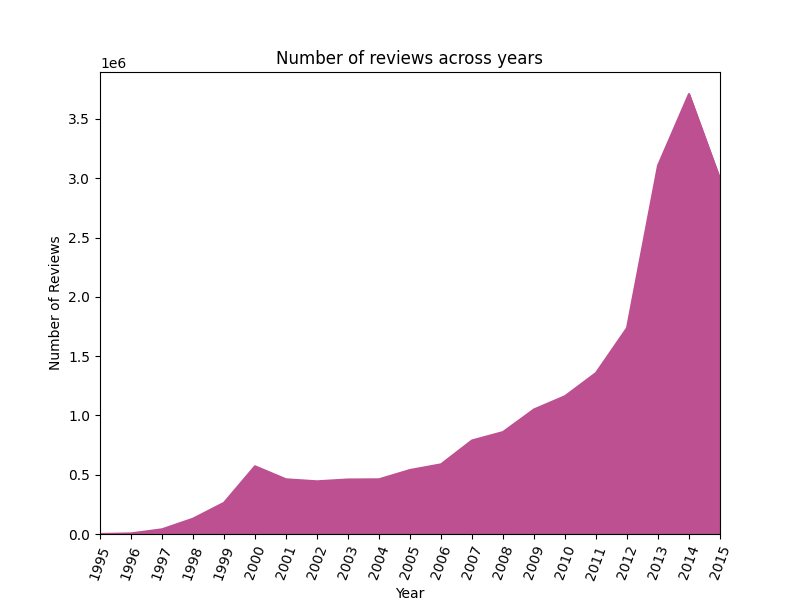

In [10]:
%matplot plt

In [11]:
# Distribution of overall star ratings
product_ratings_dist = df.groupBy('star_rating').count().orderBy('count').toPandas()

plt.clf()
labels = [f"Star Rating: {rating}" for rating in product_ratings_dist['star_rating']]
reviews = [num_reviews for num_reviews in product_ratings_dist['count']]
colors = ['#00876c', '#89c079', '#fff392', '#fc9e5a', '#de425b']
fig, ax = plt.subplots(figsize=(8,5))
w,a,b = ax.pie(reviews, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of star ratings for books')
ax.legend(w, labels, title="Star Ratings", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

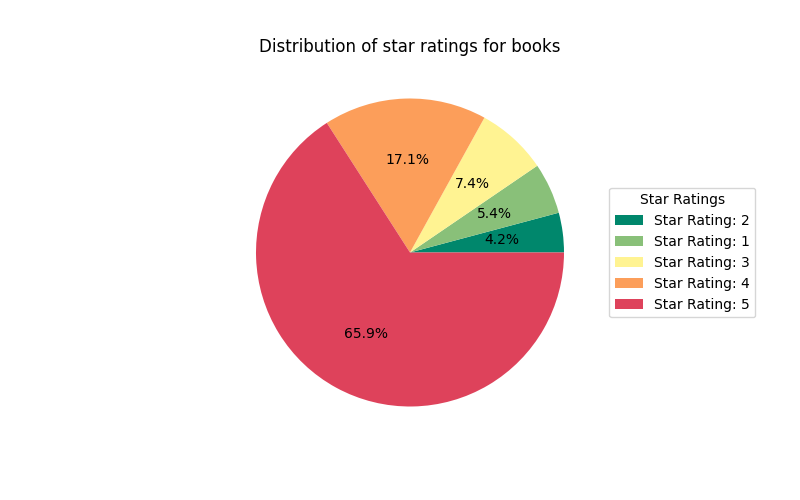

In [12]:
%matplot plt

In [13]:
sc.uninstall_package('pandas')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Uninstalling pandas-1.0.5:
  Successfully uninstalled pandas-1.0.5

You are using pip version 9.0.1, however version 22.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [14]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

aws-cfn-bootstrap (2.0)
beautifulsoup4 (4.9.3)
boto (2.49.0)
click (8.0.3)
cycler (0.11.0)
docutils (0.14)
fonttools (4.29.1)
jmespath (0.10.0)
joblib (1.1.0)
kiwisolver (1.3.2)
lockfile (0.11.0)
lxml (4.6.3)
matplotlib (3.5.1)
mysqlclient (1.4.2)
nltk (3.6.5)
nose (1.3.4)
numpy (1.19.5)
packaging (21.3)
Pillow (9.0.1)
pip (9.0.1)
py-dateutil (2.2)
pyparsing (3.0.7)
pystache (0.5.4)
python-daemon (2.2.3)
python-dateutil (2.8.2)
python37-sagemaker-pyspark (1.4.1)
pytz (2021.3)
PyYAML (5.4.1)
regex (2021.10.21)
setuptools (28.8.0)
simplejson (3.2.0)
six (1.13.0)
tqdm (4.62.3)
wheel (0.29.0)
windmill (1.6)

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
You are using pip version 9.0.1, however version 22.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.